In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os

In [2]:
# Read the dataset
data = pd.read_csv("tips.csv")

In [4]:
# Extract the BloodPressure column into a new series
total_bill_series = data['total_bill']
print(total_bill_series.head())

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64


In [5]:
# save the dataframe for offline viewing
if os.path.exists("deletethis-1.csv"):
    os.remove("deletethis-1.csv")  # Remove the file if it exists

data.to_csv("deletethis-1.csv", index=False)


In [6]:
# Calculate mean and standard deviation
mu, std = blood_pressure_series.mean(), blood_pressure_series.std()


In [7]:
# Calculate z-score for each value
z_scores = (blood_pressure_series - mu) / std



In [8]:
# Plot normal distribution graph of BloodPressure
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

(array([0.00747097, 0.        , 0.        , 0.00021346, 0.00042691,
        0.        , 0.00042691, 0.00234802, 0.00747097, 0.01536885,
        0.02454747, 0.03116462, 0.0307377 , 0.02113217, 0.01451503,
        0.00405567, 0.00149419, 0.00149419, 0.00085383, 0.00021346]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

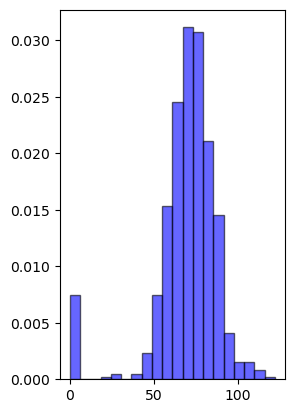

In [9]:
# Histogram
plt.subplot(1, 2, 1)
plt.hist(blood_pressure_series, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')



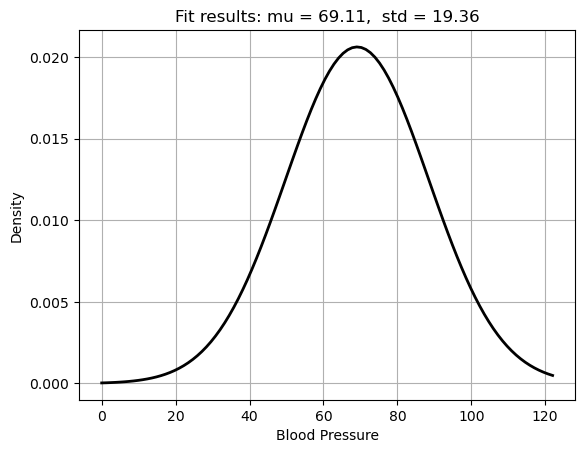

In [10]:
# Fit a normal distribution to the data
x = np.linspace(blood_pressure_series.min(), blood_pressure_series.max(), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.grid(True)



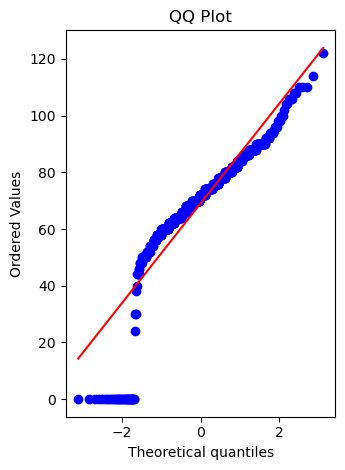

In [11]:
# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(blood_pressure_series, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()



(array([0.00747097, 0.        , 0.        , 0.00021346, 0.00042691,
        0.        , 0.00042691, 0.00234802, 0.00747097, 0.01536885,
        0.02454747, 0.03116462, 0.0307377 , 0.02113217, 0.01451503,
        0.00405567, 0.00149419, 0.00149419, 0.00085383, 0.00021346]),
 array([  0. ,   6.1,  12.2,  18.3,  24.4,  30.5,  36.6,  42.7,  48.8,
         54.9,  61. ,  67.1,  73.2,  79.3,  85.4,  91.5,  97.6, 103.7,
        109.8, 115.9, 122. ]),
 <BarContainer object of 20 artists>)

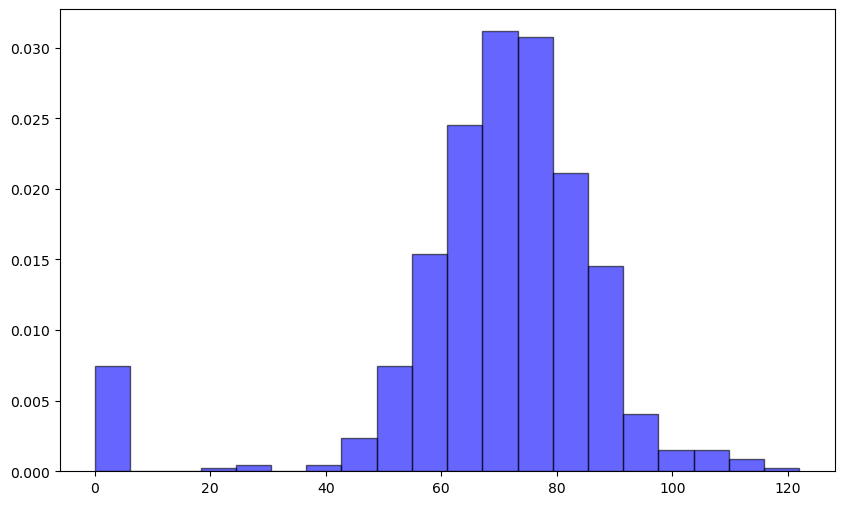

In [12]:
# Plot graph showing mean +- 3 SD
plt.figure(figsize=(10, 6))
plt.hist(blood_pressure_series, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')



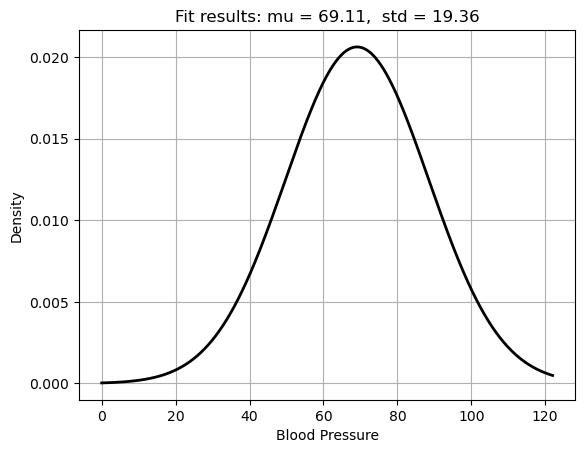

In [13]:
# Fit a normal distribution to the data
x = np.linspace(blood_pressure_series.min(), blood_pressure_series.max(), 1000)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.grid(True)



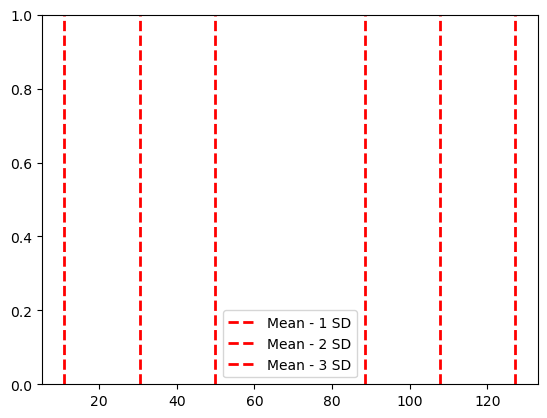

In [14]:
# Plot mean +- 3 SD
for i in range(1, 4):
    plt.axvline(mu - i*std, color='r', linestyle='--', linewidth=2, label=f'Mean - {i} SD')
    plt.axvline(mu + i*std, color='r', linestyle='--', linewidth=2)

plt.legend()
plt.show()



In [15]:
# Check if mean +- 1SD, mean +- 2SD, and mean +- 3SD satisfy the empirical rule
within_1sd = (z_scores <= 1) & (z_scores >= -1)
within_2sd = (z_scores <= 2) & (z_scores >= -2)
within_3sd = (z_scores <= 3) & (z_scores >= -3)

percentage_within_1sd = np.sum(within_1sd) / len(blood_pressure_series) * 100
percentage_within_2sd = np.sum(within_2sd) / len(blood_pressure_series) * 100
percentage_within_3sd = np.sum(within_3sd) / len(blood_pressure_series) * 100

print(f"Percentage of data within mean ± 1 SD: {percentage_within_1sd:.2f}%")
print(f"Percentage of data within mean ± 2 SD: {percentage_within_2sd:.2f}%")
print(f"Percentage of data within mean ± 3 SD: {percentage_within_3sd:.2f}%")



Percentage of data within mean ± 1 SD: 85.55%
Percentage of data within mean ± 2 SD: 94.14%
Percentage of data within mean ± 3 SD: 95.44%


In [16]:
# Create DataFrame to store BloodPressure, z-score, and within_1sd, within_2sd, within_3sd flags
result_df = pd.DataFrame({
    'BloodPressure': blood_pressure_series,
    'z_score': z_scores,
    'within_1sd': within_1sd,
    'within_2sd': within_2sd,
    'within_3sd': within_3sd
})

print(result_df.head())

if os.path.exists("deletethis-2.csv"):
    os.remove("deletethis-2.csv")  # Remove the file if it exists

result_df.to_csv("deletethis-2.csv", index=False)



   BloodPressure   z_score  within_1sd  within_2sd  within_3sd
0             72  0.149543        True        True        True
1             66 -0.160441        True        True        True
2             64 -0.263769        True        True        True
3             66 -0.160441        True        True        True
4             40 -1.503707       False        True        True


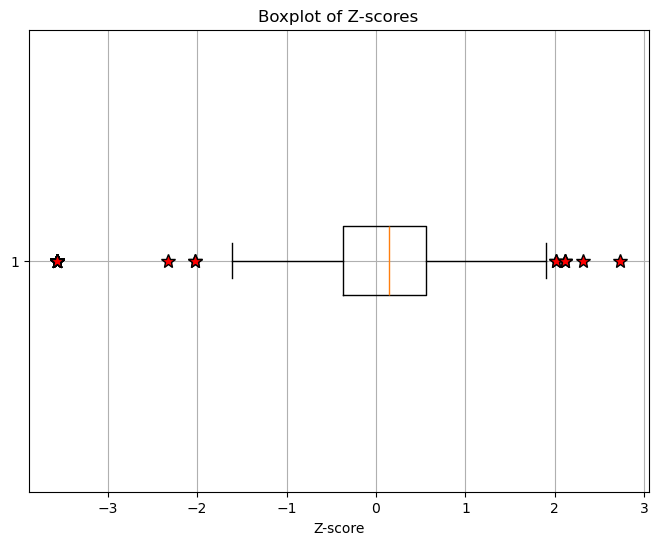

In [17]:
# Outlier z-score box plot
plt.figure(figsize=(8, 6))
plt.boxplot(result_df['z_score'], vert=False, flierprops=dict(marker='*', markerfacecolor='red', markersize=10))
plt.xlabel('Z-score')
plt.title('Boxplot of Z-scores')
plt.grid(True)
plt.show()
